# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

`.wav` файл хранит закодированную цифровую аудиозапись в двух частях: заголовок и аудиоданные.

1. Заголовок.
    Состоит из нескольких частей, обычно занимает 44 байта.

    1. RIFF Header: первые 4 байта содержат текст "RIFF", что указывает на формат.
    2. File Size: размер файла (без учёта первых 8 байт заголовка).
    3. WAVE Header: текст "WAVE", обозначающий, что это аудиофайл.
    4. Format Chunk (fmt): содержит метаданные о формате аудио:
        1. Аудиоформат.
        2. Количество каналов (моно = 1, стерео = 2).
        3. Частота дискретизации (например, 44100 Гц, 48000 Гц).
        4. Байтовая скорость.
        5. Размер блока (количество байт на один сэмпл на все каналы).
        6. Глубина квантования (например, 16 бит, 24 бита).

2. Данные.
    Аудиоданные хранятся как числовые значения, представляющие амплитуду звука в каждой точке времени. Если аудио кодировано в формате PCM, данные представляют собой последовательность чисел с определённой глубиной квантования (8, 16, 24 бит и т.д.).

Для получения информации о параметрах дискретизации и квантования можно использовать различные библиотеки для работы с аудио. Если рассматривать язык Python, то подет, нпример, `wave`. Весь код будет выглядеть как-то так:

In [ ]:
import wave

with wave.open('sample.wav', 'rb') as wav_file:
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    frame_rate = wav_file.getframerate()
    num_frames = wav_file.getnframes()
    duration = num_frames / frame_rate

    print(f"Channels: {num_channels}")
    print(f"Sample width: {sample_width * 8} bits")
    print(f"Frame rate: {frame_rate} Hz")
    print(f"Duration: {duration:.2f} sec")

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

Записать аудиофайл можно и при помощи Python (код ниже блоком). Кроме новых зависимостей, нужно дополнительно установить `portaudio`:
```bash
sudo apt-get install libportaudio2
```
Запись моего голоса лежит в `resources`.

In [5]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile

duration = 5
samplerate = 44100

print("Начало записи...")
audio = sd.rec(int(duration * samplerate), samplerate=samplerate, channels=1, dtype='int16')
sd.wait()
print("Запись завершена!")

wavfile.write("resources/output.wav", samplerate, audio)

Начало записи...
Запись завершена!


Поменял чистоту до 8000 Гц (было 44100).

In [6]:
from scipy.signal import resample

def change_sample_rate(input_file, output_file, new_samplerate):
    samplerate, data = wavfile.read(input_file)
    
    number_of_samples = round(len(data) * float(new_samplerate) / samplerate)
    resampled_data = resample(data, number_of_samples)
    
    wavfile.write(output_file, new_samplerate, np.asarray(resampled_data, dtype='int16'))

change_sample_rate("resources/output.wav", "resources/resampled_output_8000.wav", 8000)

Визуализируем.

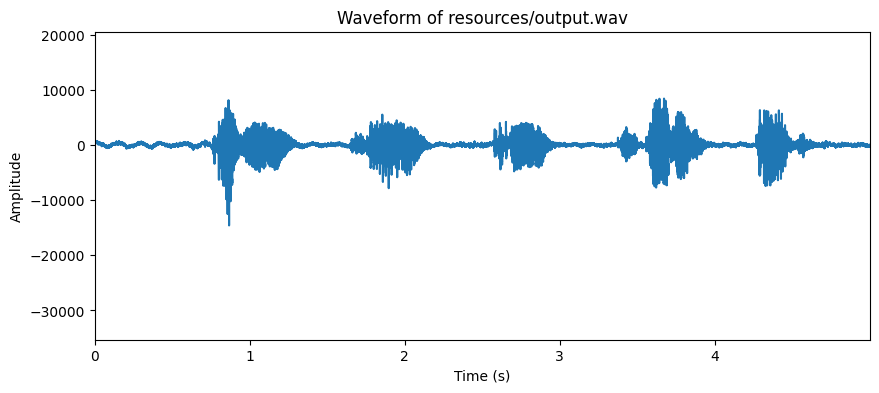

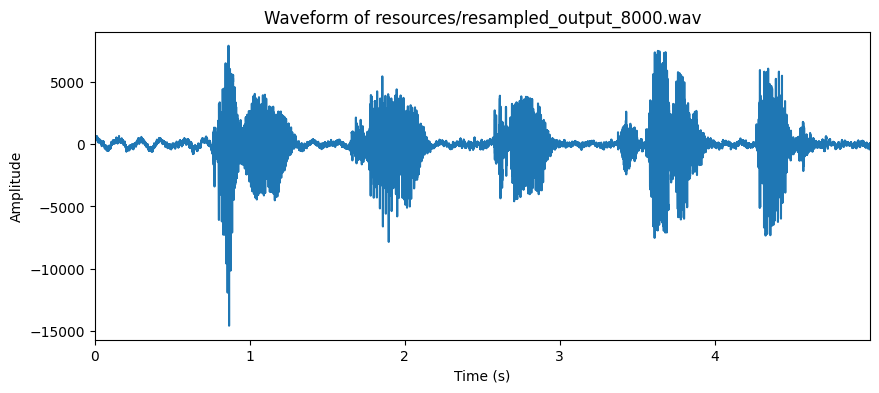

In [9]:
import matplotlib.pyplot as plt

def plot_waveform(file):
    samplerate, data = wavfile.read(file)
    times = np.arange(len(data)) / float(samplerate)

    plt.figure(figsize=(10, 4))
    plt.plot(times, data)
    plt.title(f"Waveform of {file}")
    plt.ylabel("Amplitude")
    plt.xlabel("Time (s)")
    plt.xlim([0, times[-1]])
    plt.show()

plot_waveform("resources/output.wav")
plot_waveform("resources/resampled_output_8000.wav")

Для анализа частот дескретизации, при которых моя речь становится неразборчивой, будем играться с функцией `change_sample_rate` и разными частотами.

В итоге, я везде мог различать свой голос и слышать то, что я говорил. Но (мне кажется) это из-за некого bias, связанного с тем, что я и так знаю, что говорил. Но при частоте 1000-2000 Гц уже было понятно, что новому человеку будет сложно понять, что я говорил. Но для воспреизведения таких файлов нужно было написать отдельную функцию (так как встроенный плейер не справлялся).

In [20]:
change_sample_rate("resources/output.wav", "resources/resampled_output_2000.wav", 2000)

def play_audio(file):
    samplerate, data = wavfile.read(file)
    sd.play(data, samplerate)
    sd.wait()

play_audio("resources/resampled_output_2000.wav")

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Они отличаются по тому, как сжимается, кодируется звук, по его качеству.

1. `wav`.
    1. Чаще всего без сжатия (Linear PCM), что обеспечивает высокое качество, но и большой размер файлов. Используется для профессиональной работы со звуком, когда требуется сохранение максимального качества.
    2. Очень большие файлы из-за отсутствия сжатия.
2. `mp3`.
    1. Сжатый формат с потерями. Удаляются части звуковых данных, которые считаются несущественными для человеческого слуха.
    2. Популярен для распространения музыки и прочих аудиофайлов, так как сохраняет приемлемое качество при значительно меньшем размере файла.
    3. Файл гораздо меньше по сравнению с WAV, но с потерей некоторого качества.
3. `ogg`.
    1. Также сжатие с потерями, как и в MP3, но часто считается более эффективным в плане качества звука при тех же битрейтах. Чаще встречается в open-source проектах.
    2. Сравним с MP3 по размеру файла, но иногда немного меньше при схожем качестве.

In [ ]:
# MY ANSWER ABOVE

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [21]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [22]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

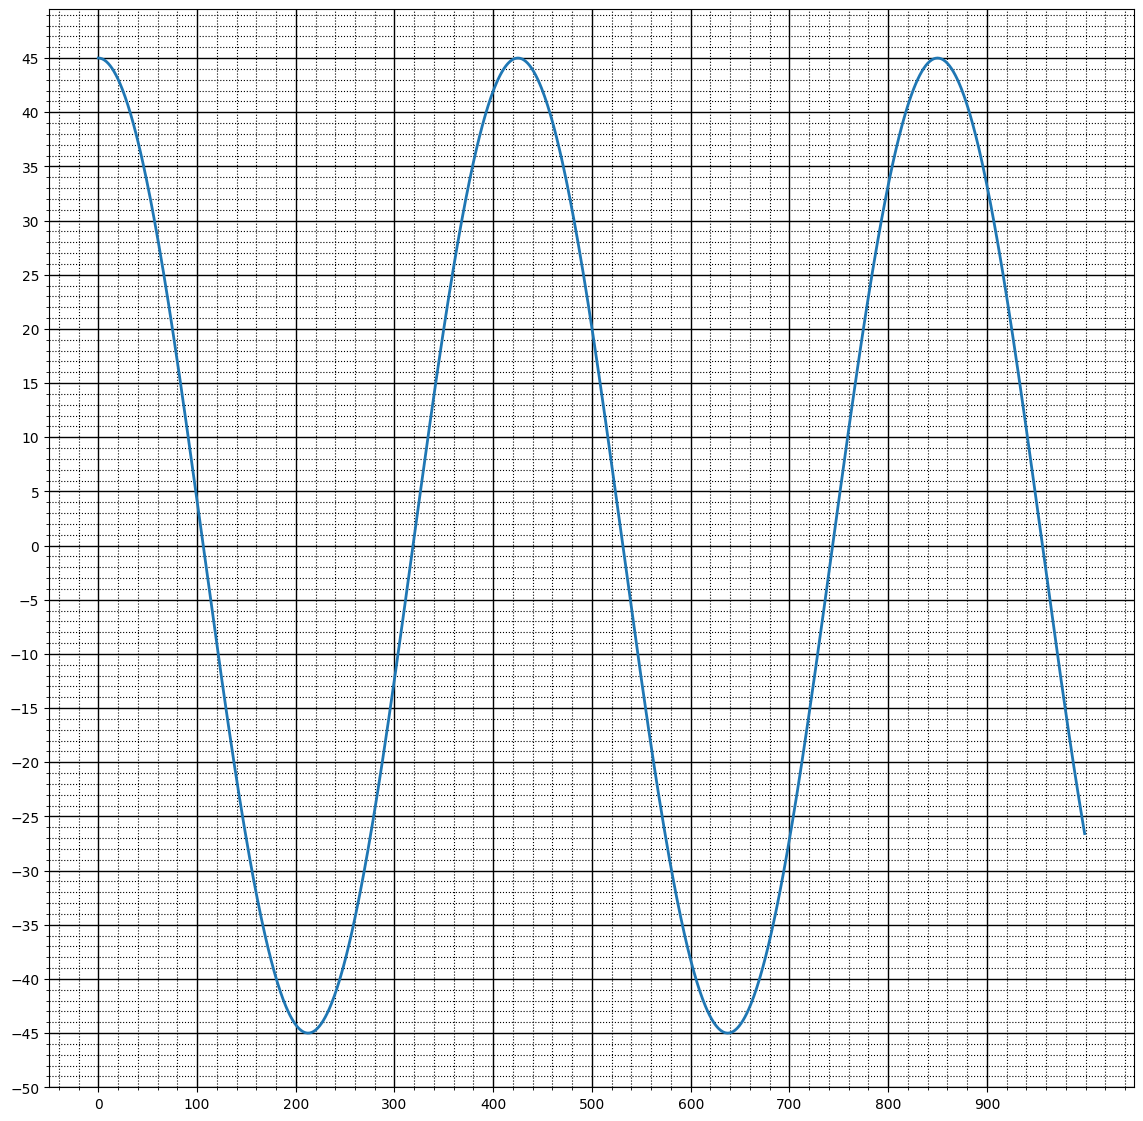

In [23]:
draw_signal(test_data['task2']['a'])

In [54]:
import numpy as np

i = np.arange(1000)
a = 45 * np.cos(i / 67.64)

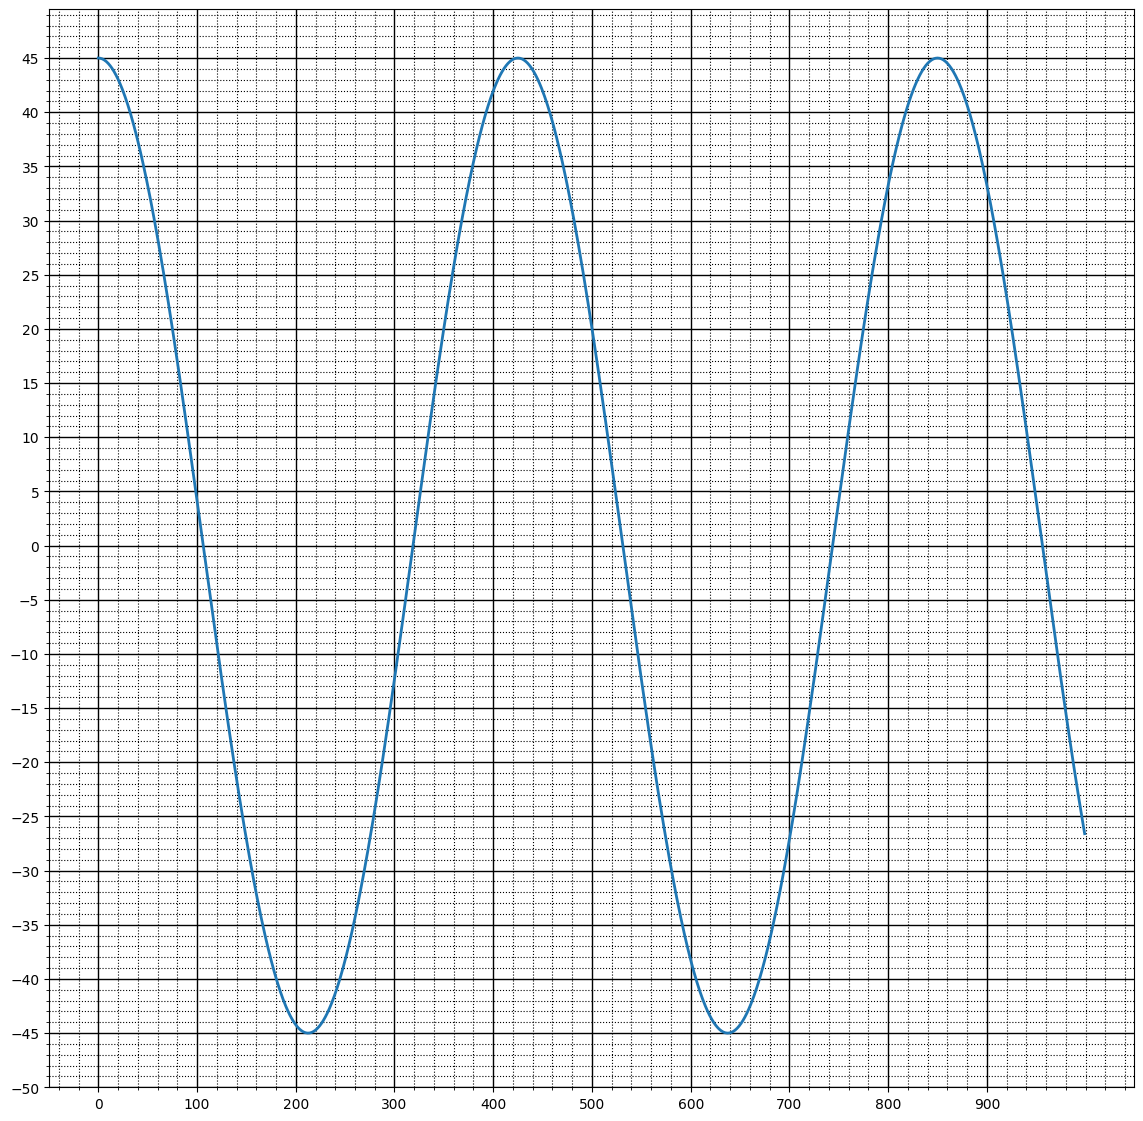

In [55]:
draw_signal(a)

In [56]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A = 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) \approx \frac{2\pi}{425} = 0.0148$

3. Фаза - $\phi= 0$

### Сигнал ***b***

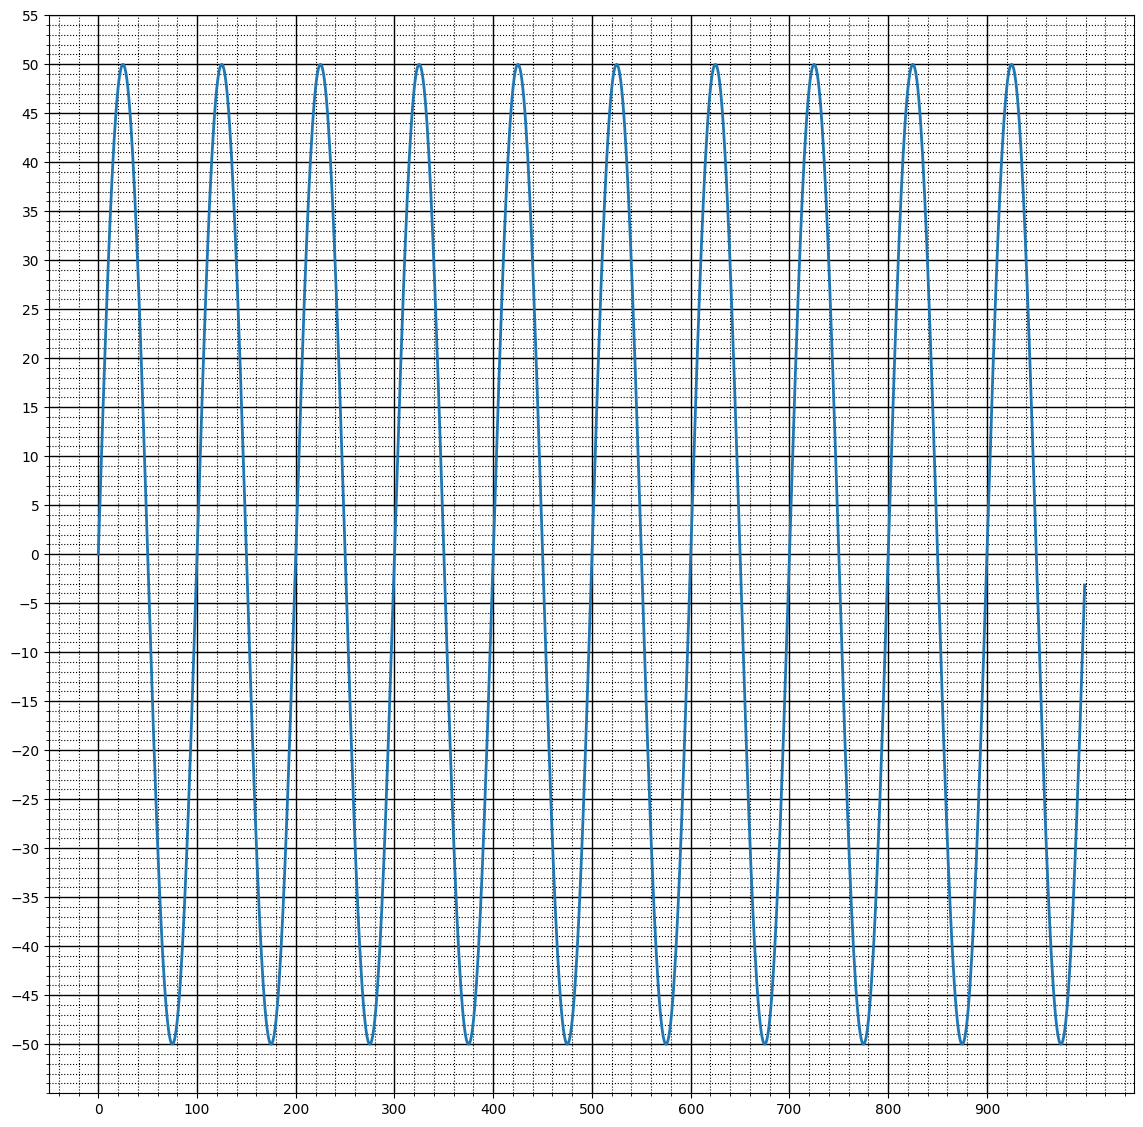

In [57]:
draw_signal(test_data['task2']['b'])

In [59]:
b = 50 * np.sin(i / 15.92)

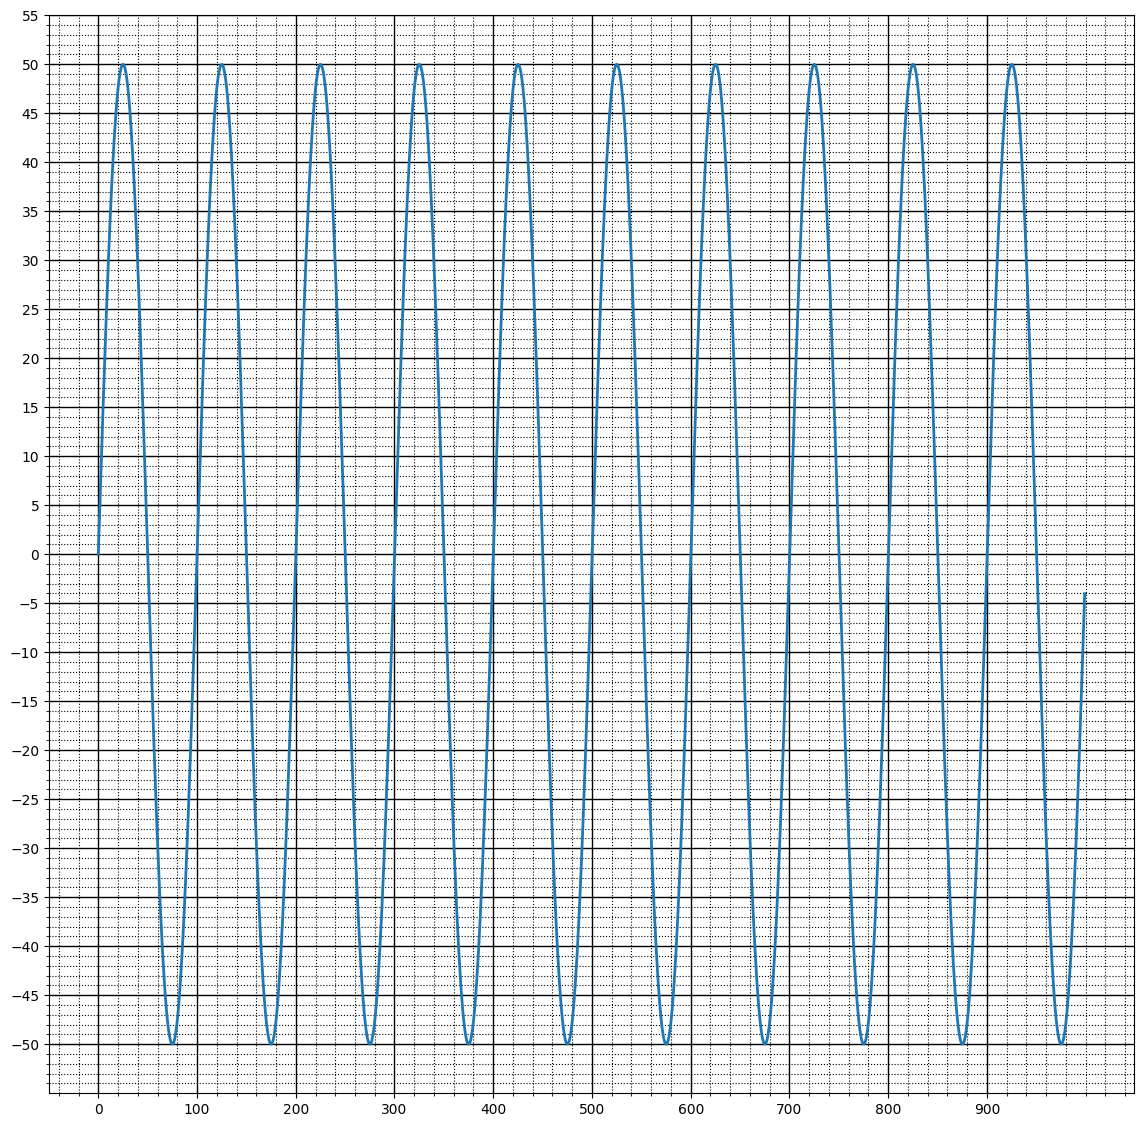

In [60]:
draw_signal(b)

In [61]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) \approx \frac{2\pi}{100} = 0.0628$

3. Фаза - $\phi= 0$

### Сигнал ***c***

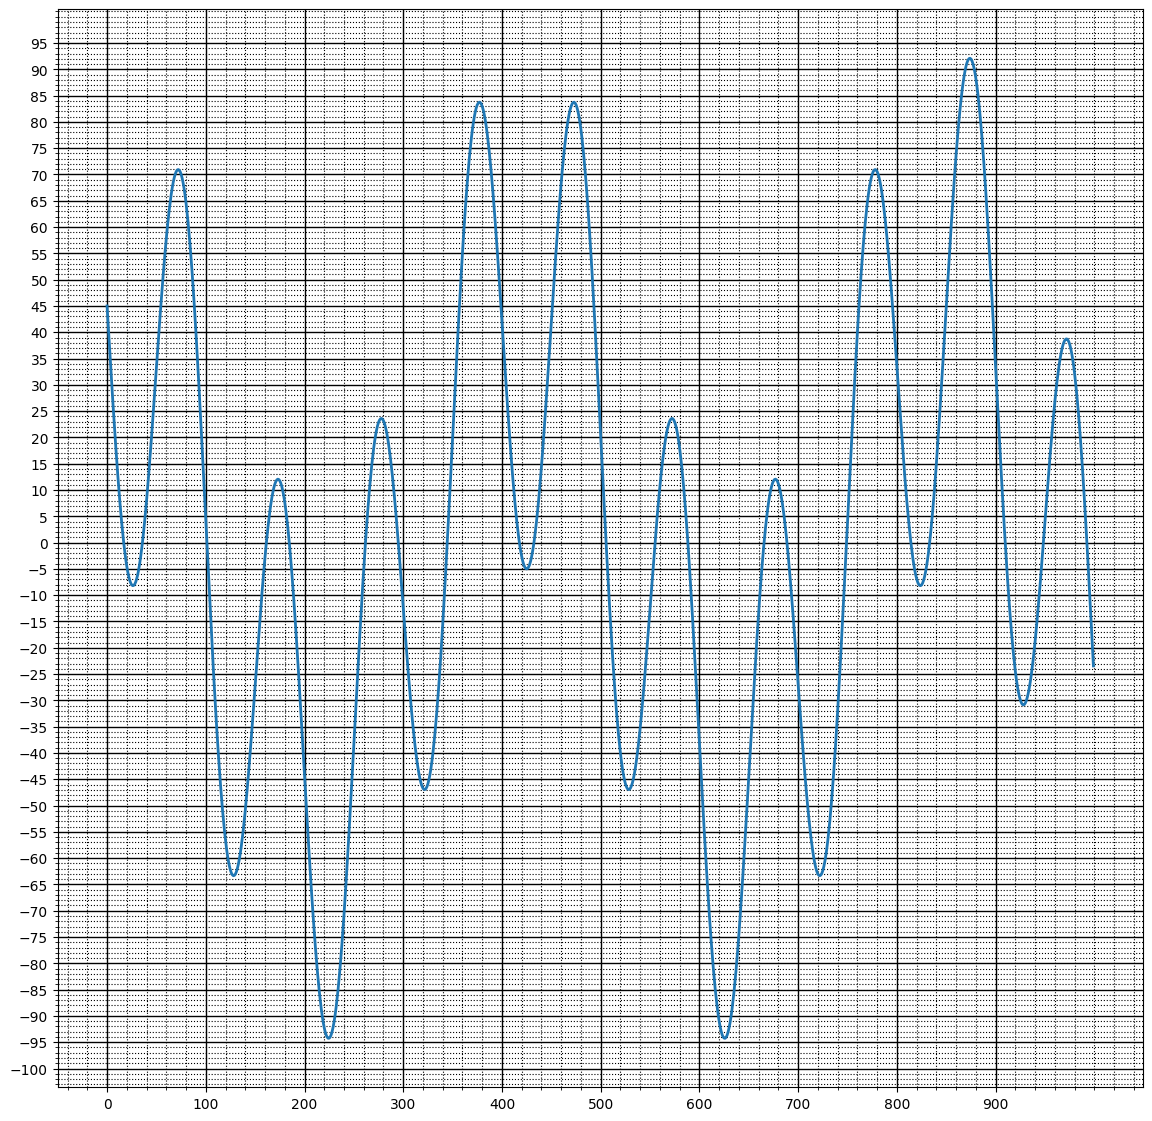

In [62]:
draw_signal(test_data['task2']['c'])

In [216]:
# сигнал состоит из двух гармоник
c = 45 * np.cos(i / 67.64) - 50 * np.sin(i / 15.92)

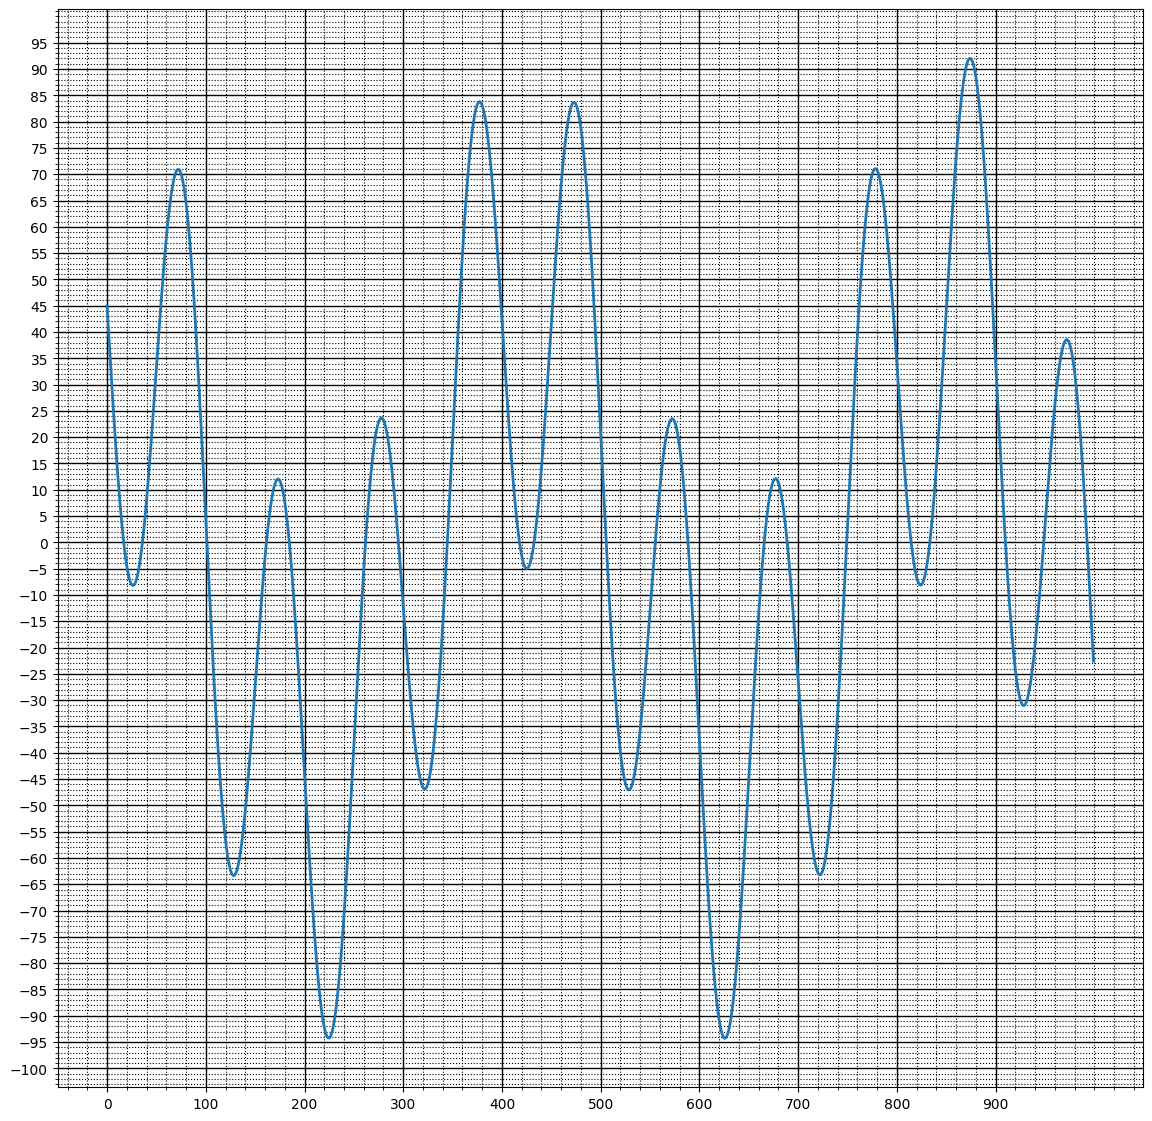

In [217]:
draw_signal(c)

In [218]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [1]:
def convolve(in1, in2):
    len_in1 = len(in1)
    len_in2 = len(in2)
    res_len = len_in1 + len_in2 - 1
    res = [0] * res_len
    
    for i in range(len_in1):
        for j in range(len_in2):
            res[i + j] += in1[i] * in2[j]
    
    return res

In [9]:
import scipy

def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [5]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [10]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

Text(0, 0.5, 'Value')

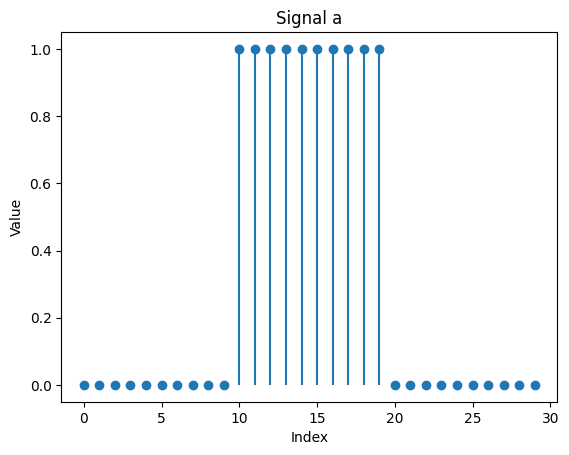

In [30]:
x_a = np.arange(len(a))

plt.stem(x_a, a, basefmt=" ")
plt.title("Signal a")
plt.xlabel("Index")
plt.ylabel("Value")

Сигнал **b**

Text(0, 0.5, 'Value')

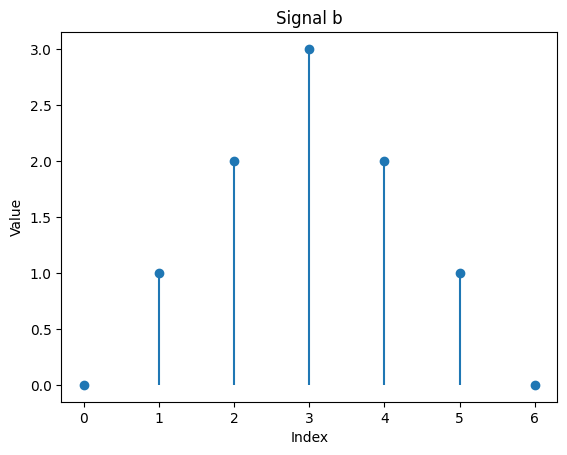

In [21]:
x_b = np.arange(len(b))

plt.stem(x_b, b, basefmt=" ")
plt.title("Signal b")
plt.xlabel("Index")
plt.ylabel("Value")

Свертка **a** и **b**

Text(0, 0.5, 'Value')

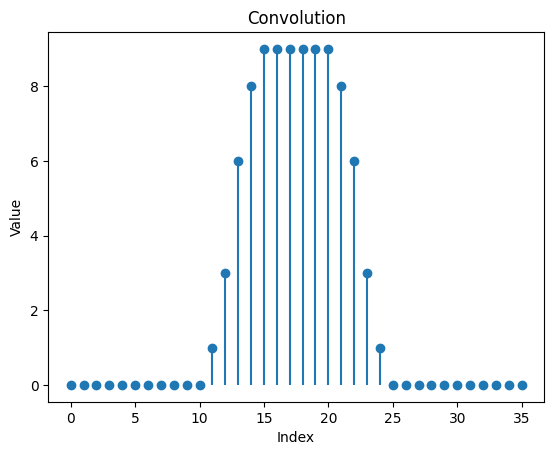

In [22]:
c = convolve(a, b)
x_c = np.arange(len(c))

plt.stem(x_c, c, basefmt=" ")
plt.title("Convolution")
plt.xlabel("Index")
plt.ylabel("Value")

Все 3 графика на одной картинке:

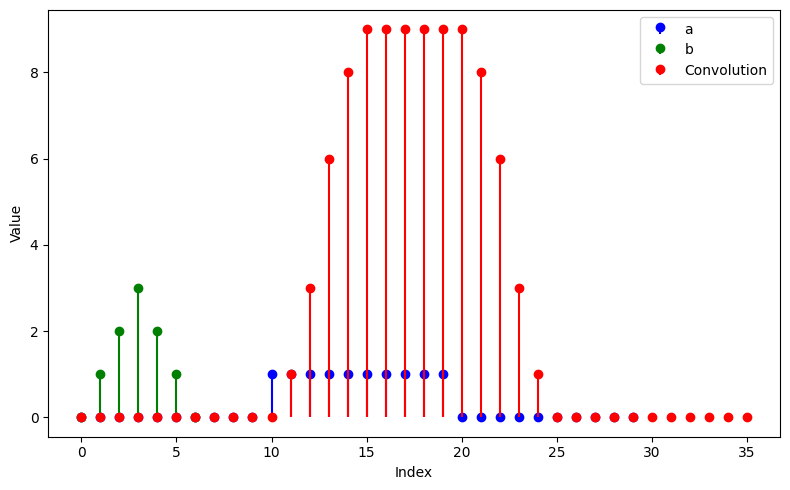

In [26]:
plt.figure(figsize=(8, 5))
plt.stem(x_a, a, linefmt='b-', markerfmt='bo', basefmt=" ", label="a")
plt.stem(x_b, b, linefmt='g-', markerfmt='go', basefmt=" ", label="b")
plt.stem(x_c, c, linefmt='r-', markerfmt='ro', basefmt=" ", label="Convolution")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    # YOUR CODE HERE

   

    raise NotImplementedError()

In [ ]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE